# WeatherPy
----


# Anaylsis
----

* On the 9th of April 2022 in the northern hemisphere there was a stronger relasionship between distance from the equator and 
  lower tempretures than could be seen in the southern hemisphere.
* There was no strong relasionship between lattitude and wind speed.
* There was no strong relationship between latitude and humidity or cloudiness.

In [66]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from citipy import citipy

# Import API key from file
from api_keys import weather_api_key


# Output File (CSV)
output_data_file = "../output_data/cities.csv"



In [8]:
output_data_file

'../output_data/cities.csv'

## Generate Cities List

In [9]:
# Create empty lists for lattitude and longitude and for city names
lat_lngs = []
cities = []

# define the ranges of lattitude and longitude and save into variables
lat_range = (-90, 90)
lng_range = (-180, 180)

# using numpy generate 1500 randon number combinations within the defined ranges to ensure sufficient to achieve a minimum of 500 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# zip the to list together and save into variable lats_lngs
lats_lngs = zip(lats, lngs)

# Loop through the lats_lngs series using the citipy.nearest_city function to find the city_name of the nearest city
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city_name doesnt already exist then add it to the cities list
    if city not in cities:
        cities.append(city)

# Using the len() function count the number of cities in the list to ensure that it is over 500
len(cities)

613

In [10]:
print(cities)

['guarapari', 'cidreira', 'kapaa', 'tsihombe', 'kempele', 'hilo', 'saint-philippe', 'rikitea', 'shirgaon', 'mataura', 'logumkloster', 'veshenskaya', 'krasnoselkup', 'ketchikan', 'mar del plata', 'upernavik', 'yellowknife', 'egvekinot', 'otradnoye', 'cape town', 'east london', 'kuche', 'bluff', 'belyy yar', 'atuona', 'sonoita', 'dhuburi', 'provideniya', 'lalomanu', 'clyde river', 'belushya guba', 'moquegua', 'avarua', 'hermanus', 'hobyo', 'busselton', 'puerto ayora', 'mao', 'correntina', 'vostok', 'hamilton', 'shitanjing', 'bengkulu', 'nizhniy kuranakh', 'khatanga', 'sarkand', 'thompson', 'victoria', 'nikolskoye', 'ilulissat', 'kodiak', 'sentyabrskiy', 'chumikan', 'samana', 'tiksi', 'doka', 'new norfolk', 'souillac', 'lahij', 'tasiilaq', 'port alfred', 'ola', 'araouane', 'nanortalik', 'wulanhaote', 'ribeira grande', 'korla', 'esperance', 'fort saint john', 'taolanaro', 'matsanga', 'vaini', 'airai', 'mustasaari', 'taft', 'vorsma', 'ushuaia', 'laguna', 'pevek', 'tarana', 'awbari', 'camapu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Create the URL for the Weather Map API Call requesting imperial measurments and adding the api key from my api_keys file

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # print url to check
print(url)

# create an empty list for the results of the api call
city_data = []

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=36426fe7b8f897a2610ab86f3f9f9741


In [12]:
len(city_data)

0

In [13]:
#Print an opening statement to log each city as it's being processed, with the city number and city name.  
print("Retrieving cities     ")
print("-----------------------------")

# Create counters to track how many api calls have been done 
call_counter = 1
set_counter = 1

# loop through the cities list
for i, city in enumerate(cities):
    
# Grouping the calls in sets of 20
     if (i % 20 == 0 and i >= 20):
         set_counter += 1
         call_counter = 0    

# Create the endpoint URL with each city_name added 
     city_url = url + "&q=" + city
    
# Log and print the url call number and city
     print("Processing call %s of Set %s | %s" % (call_counter, set_counter, city))
         
    # Add 1 to the call counter
     call_counter += 1
        
     # Run an API request for each of the cities, use try/except to ensure that the code continues to run when a city isnt found
     try:
         # retrieve the data as a Json
         city_weather = requests.get(city_url).json()

         # retrieve the lattitude, longitude, max temp, cloudiness, wind speed & humidity plus the country and date. save to variables
         city_lat = city_weather["coord"]["lat"]
         city_lng = city_weather["coord"]["lon"]
         city_max_temp = city_weather["main"]["temp_max"]
         city_humidity = city_weather["main"]["humidity"]
         city_clouds = city_weather["clouds"]["all"]
         city_wind = city_weather["wind"]["speed"]
         city_country = city_weather["sys"]["country"]
         city_date = city_weather["dt"]

         # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # print exception statement  
     except:
         print("Unable to retrive weather data. Skip to the next city...")
         pass
                      

                    

Retrieving cities     
-----------------------------
Processing call 1 of Set 1 | guarapari
Processing call 2 of Set 1 | cidreira
Processing call 3 of Set 1 | kapaa
Processing call 4 of Set 1 | tsihombe
Unable to retrive weather data. Skip to the next city...
Processing call 5 of Set 1 | kempele
Processing call 6 of Set 1 | hilo
Processing call 7 of Set 1 | saint-philippe
Processing call 8 of Set 1 | rikitea
Processing call 9 of Set 1 | shirgaon
Processing call 10 of Set 1 | mataura
Processing call 11 of Set 1 | logumkloster
Processing call 12 of Set 1 | veshenskaya
Processing call 13 of Set 1 | krasnoselkup
Processing call 14 of Set 1 | ketchikan
Processing call 15 of Set 1 | mar del plata
Processing call 16 of Set 1 | upernavik
Processing call 17 of Set 1 | yellowknife
Processing call 18 of Set 1 | egvekinot
Processing call 19 of Set 1 | otradnoye
Processing call 20 of Set 1 | cape town
Processing call 0 of Set 2 | east london
Processing call 1 of Set 2 | kuche
Unable to retrive weat

Processing call 4 of Set 10 | moura
Processing call 5 of Set 10 | khonuu
Unable to retrive weather data. Skip to the next city...
Processing call 6 of Set 10 | saskylakh
Processing call 7 of Set 10 | bretten
Processing call 8 of Set 10 | harper
Processing call 9 of Set 10 | port-cartier
Processing call 10 of Set 10 | belousovka
Processing call 11 of Set 10 | guayaramerin
Processing call 12 of Set 10 | kobe
Processing call 13 of Set 10 | illoqqortoormiut
Unable to retrive weather data. Skip to the next city...
Processing call 14 of Set 10 | marawi
Processing call 15 of Set 10 | grand gaube
Processing call 16 of Set 10 | koungou
Processing call 17 of Set 10 | vieux-habitants
Processing call 18 of Set 10 | borna
Processing call 19 of Set 10 | owando
Processing call 0 of Set 11 | general cepeda
Processing call 1 of Set 11 | grindavik
Processing call 2 of Set 11 | lagos
Processing call 3 of Set 11 | maniitsoq
Processing call 4 of Set 11 | saint anthony
Processing call 5 of Set 11 | pampa
Pr

Processing call 6 of Set 19 | lishu
Processing call 7 of Set 19 | amuntai
Processing call 8 of Set 19 | lagoa
Processing call 9 of Set 19 | phan thiet
Processing call 10 of Set 19 | iralaya
Processing call 11 of Set 19 | san benedetto del tronto
Processing call 12 of Set 19 | itoman
Processing call 13 of Set 19 | usoke
Processing call 14 of Set 19 | beisfjord
Processing call 15 of Set 19 | itacare
Processing call 16 of Set 19 | angra
Unable to retrive weather data. Skip to the next city...
Processing call 17 of Set 19 | zhigansk
Processing call 18 of Set 19 | sept-iles
Processing call 19 of Set 19 | aurora
Processing call 0 of Set 20 | abbeville
Processing call 1 of Set 20 | zhoucheng
Processing call 2 of Set 20 | ponta do sol
Processing call 3 of Set 20 | krasnaya gora
Processing call 4 of Set 20 | sao felix do xingu
Processing call 5 of Set 20 | aykhal
Processing call 6 of Set 20 | blagoyevo
Processing call 7 of Set 20 | tessalit
Processing call 8 of Set 20 | mackay
Processing call 9

Processing call 16 of Set 28 | kyren
Processing call 17 of Set 28 | gwadar
Processing call 18 of Set 28 | mogadishu
Processing call 19 of Set 28 | gold coast
Processing call 0 of Set 29 | menongue
Processing call 1 of Set 29 | hambantota
Processing call 2 of Set 29 | yar-sale
Processing call 3 of Set 29 | vila velha
Processing call 4 of Set 29 | aden
Processing call 5 of Set 29 | murakami
Processing call 6 of Set 29 | omboue
Processing call 7 of Set 29 | gamboma
Processing call 8 of Set 29 | toliary
Unable to retrive weather data. Skip to the next city...
Processing call 9 of Set 29 | chyhyryn
Processing call 10 of Set 29 | sorvag
Unable to retrive weather data. Skip to the next city...
Processing call 11 of Set 29 | pasaje
Processing call 12 of Set 29 | pentecoste
Processing call 13 of Set 29 | concepcion del uruguay
Processing call 14 of Set 29 | charters towers
Processing call 15 of Set 29 | waterloo
Processing call 16 of Set 29 | maumere
Processing call 17 of Set 29 | baglan
Proces

In [14]:
# Check the length of the city_data list to ensure that it is over 500
len(city_data)

558

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Convert the city_data array into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [16]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,86.90,61,98,6.44,BR,1649513564
1,cidreira,-30.1811,-50.2056,71.82,83,97,9.15,BR,1649513564
2,kapaa,22.0752,-159.3190,73.47,88,100,20.71,US,1649513509
3,kempele,64.9131,25.5034,40.12,52,75,5.75,FI,1649513565
4,hilo,19.7297,-155.0900,69.53,83,100,5.75,US,1649513565


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# Display the statistical values 
city_data_pd.describe()
# There are no cities in the data with humidity over 100


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.621734,19.177754,60.276989,68.439068,60.517921,8.910197,1.649514e+09
std,33.944271,88.806074,25.930367,24.281985,39.517224,6.150460,5.644577e+01
min,-54.800000,-179.166700,-25.080000,1.000000,0.000000,0.000000,1.649513e+09
25%,-9.663525,-57.648775,42.972500,56.250000,20.000000,4.387500,1.649514e+09
50%,22.925000,23.153950,66.460000,74.000000,75.000000,7.340000,1.649514e+09
75%,49.670200,96.932125,79.970000,85.000000,100.000000,12.100000,1.649514e+09
max,78.218600,179.316700,109.000000,100.000000,100.000000,34.830000,1.649514e+09


In [18]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,86.90,61,98,6.44,BR,1649513564
1,cidreira,-30.1811,-50.2056,71.82,83,97,9.15,BR,1649513564
2,kapaa,22.0752,-159.3190,73.47,88,100,20.71,US,1649513509
3,kempele,64.9131,25.5034,40.12,52,75,5.75,FI,1649513565
4,hilo,19.7297,-155.0900,69.53,83,100,5.75,US,1649513565
...,...,...,...,...,...,...,...,...,...
553,kuytun,54.3419,101.5036,30.06,78,100,10.16,RU,1649513628
554,grand-lahou,5.1367,-5.0242,86.40,69,50,10.78,CI,1649513628
555,sterling,39.0062,-77.4286,52.21,67,75,10.36,US,1649513628
556,kavaratti,10.5669,72.6420,84.27,75,93,9.15,IN,1649513628


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

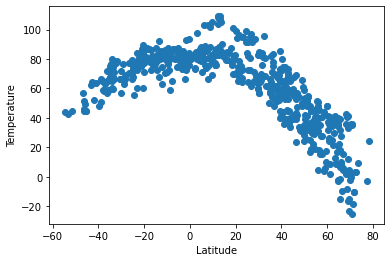

In [19]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_pd['Lat']
y_values = city_data_pd['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Temperature Plot

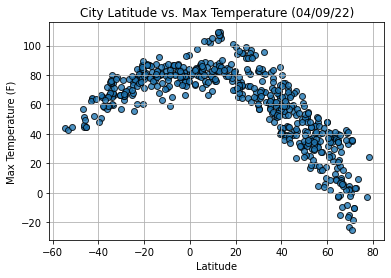

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

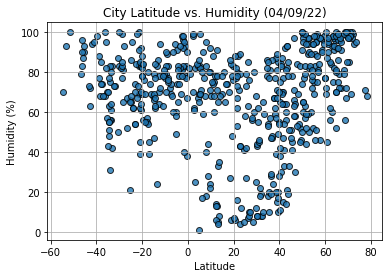

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

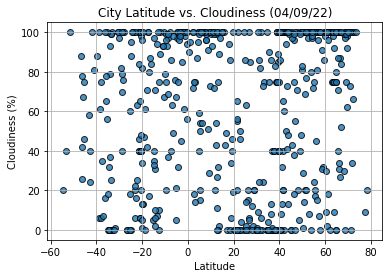

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

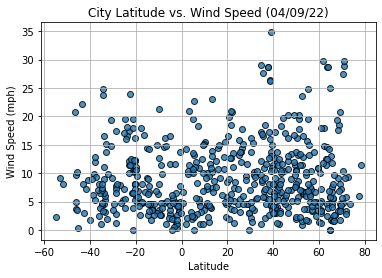

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")

# Show plot
plt.show()


## Linear Regression

In [53]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [54]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-value is: 0.7549330252026621


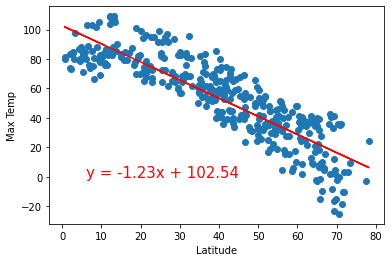

<function matplotlib.pyplot.show(close=None, block=None)>

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,0))
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5047016651535364


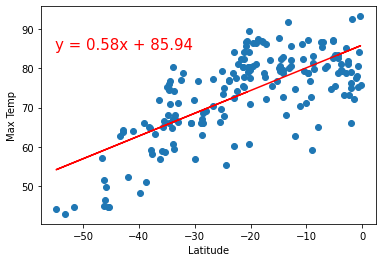

<function matplotlib.pyplot.show(close=None, block=None)>

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 85))
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14559104848185508


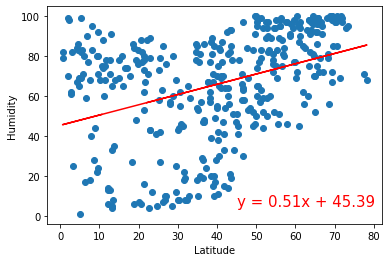

<function matplotlib.pyplot.show(close=None, block=None)>

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,5))
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002504124102603769


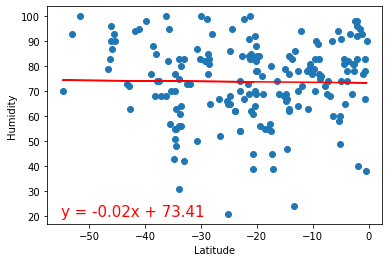

<function matplotlib.pyplot.show(close=None, block=None)>

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-55, 20))
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.025072595267351765


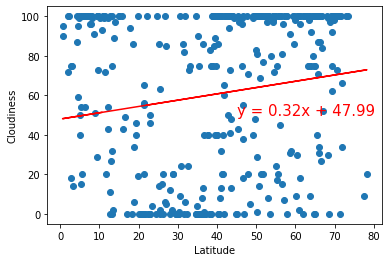

<function matplotlib.pyplot.show(close=None, block=None)>

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,50))
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07257672025066346


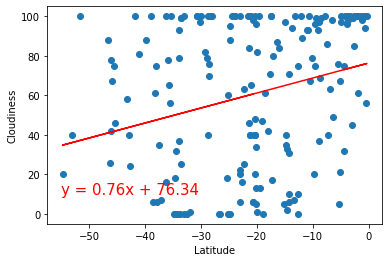

<function matplotlib.pyplot.show(close=None, block=None)>

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 5.7476514753200476e-05


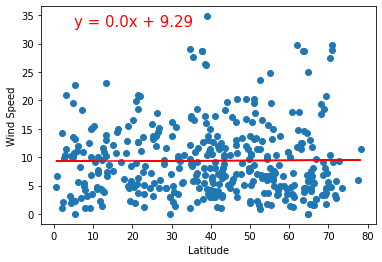

<function matplotlib.pyplot.show(close=None, block=None)>

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,33))
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03369315179357927


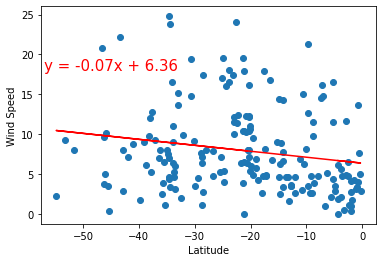

<function matplotlib.pyplot.show(close=None, block=None)>

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-57, 18))
plt.show